Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [1]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Objective 2.
#Select a number of asset classes ( > 1 ) and a number of observations ( > 500 ).  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.

#sets A,B,C..stocks(the number of stocks uesd in protpfolio(5 different stocks))
no_of_asset_classes = 5
#number of rows(1000 historical return values for each stock)
no_of_observations = 1000

In [3]:
#set the random number generator to begin from a specific position 
np.random.seed(123)
#generate a matrix of random number of size no_of_asset_classes x no_of_observations(5 x 1000)
#can use stocks data here just read this data from yahoo finance without need to generate random number
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)

#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".
  
# sets the number of portfolios to test
no_of_portfolios = 2000
#print(matrix_of_return_values)

In [4]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [5]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    #divide the random number in list random_asset_weights by thier sum
    #make the random numbers in the list random_asset_weights be fractions thad add to one(1)
    random_asset_weights /=sum(random_asset_weights)
    random_asset_weights=np.asmatrix(random_asset_weights)
    return random_asset_weights
#print(get_random_asset_weights(no_of_asset_classes)) 

In [6]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".
def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    #calculates numpy matrix of mean for different stocks over time(no of class)
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    #calculates numpy matrix of covariances for different stocks over time
    asset_covariances =np.asmatrix(np.cov(matrix_of_return_values))
    #T just to transform matrix from 1*n to become n*1
    portfolio_mean =asset_weights*asset_means.T
    # capture the single float from the numpy matrix
    portfolio_mean=portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights*asset_covariances*asset_weights.T)
    portfolio_standard_deviation=portfolio_standard_deviation.item()
    portfolio_sharpe_ratio =portfolio_mean / portfolio_standard_deviation
    # if rf not equals 0 the equation ==>(portfolio_mean - r_f)/portfolio_standard_deviationS
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
#get_portfolio_statistics(get_random_asset_weights(no_of_asset_classes),matrix_of_return_values)


In [7]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.

#initialize a while loop that ens after no_of_portfolios of iterations
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[0])
    portfolio_standard_deviations.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append( get_portfolio_statistics(random_asset_weights,matrix_of_return_values)[2])

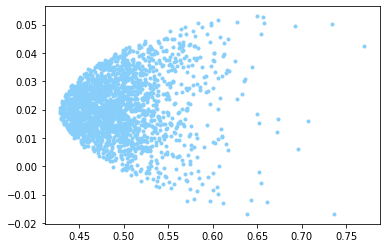

In [13]:
#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [15]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))


In [16]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

#print the details of the most efficient portfolio found
print(collection_of_random_asset_weights[index])
print(portfolio_sharpe_ratios[index])

[[0.00813065 0.11182251 0.15077842 0.32023582 0.40903259]]
0.08673489339606798


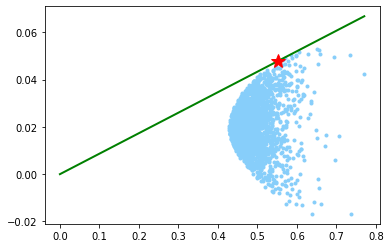

0.5523626071360005 0.04790911184591518


In [23]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
#if rf not egual zero ===>portfolio_sharpe_ratios[index] * x +rf
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
#plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [21]:
#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

-- if risk free rate not equals zero (first must subtract risk free rate from portofolio mean when calculate protofolio sharp ratio) equation become ==>(portfolio_mean - risk_free_rate)/portfolio_standard_deviationS 
(second must add risk free rate when calculate Captial market line equation become portfolio_sharpe_ratios[index] * x +risk_free_rate)--